Found 570 images belonging to 5 classes.
Found 443 images belonging to 5 classes.
Epoch 1/16
22/22 [==============================] - 14s 601ms/step - loss: 1.4430 - accuracy: 0.4110 - val_loss: 1.3916 - val_accuracy: 0.4235
Epoch 2/16
22/22 [==============================] - 13s 596ms/step - loss: 1.1837 - accuracy: 0.5560 - val_loss: 1.2614 - val_accuracy: 0.5576
Epoch 3/16
22/22 [==============================] - 13s 602ms/step - loss: 1.0071 - accuracy: 0.6220 - val_loss: 1.1910 - val_accuracy: 0.5671
Epoch 4/16
22/22 [==============================] - 13s 597ms/step - loss: 0.9746 - accuracy: 0.6349 - val_loss: 1.0703 - val_accuracy: 0.6024
Epoch 5/16
22/22 [==============================] - 13s 601ms/step - loss: 0.8886 - accuracy: 0.6459 - val_loss: 1.0359 - val_accuracy: 0.6118
Epoch 6/16
22/22 [==============================] - 13s 601ms/step - loss: 0.7989 - accuracy: 0.6972 - val_loss: 1.0094 - val_accuracy: 0.6071
Epoch 7/16
22/22 [==============================] - 14s 618m

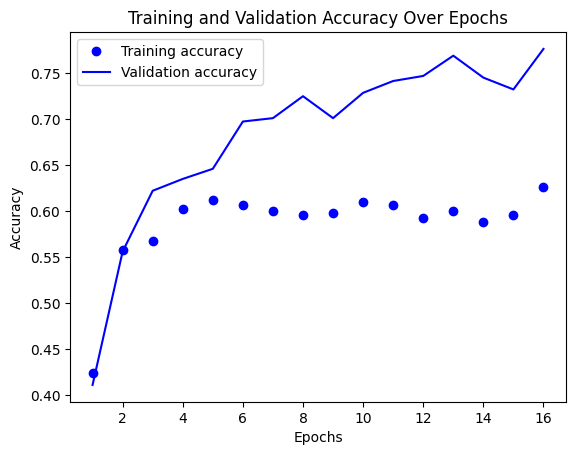

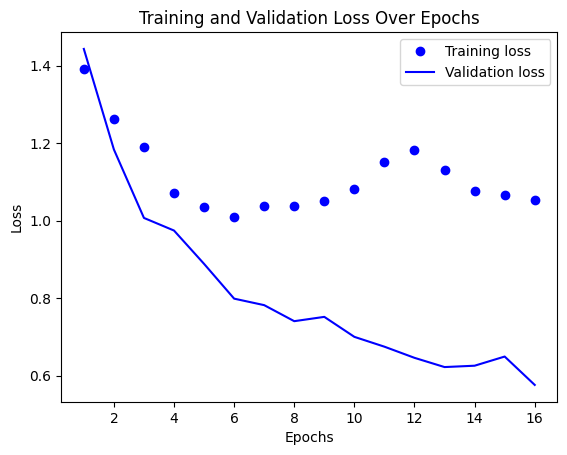

In [17]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

# Directorios de datos
train_dir = 'flowers'
test_dir = 'entrenamiento'

# Parámetros del modelo
img_width, img_height = 151, 151
input_shape = (img_width, img_height, 3)
epochs = 16
batch_size = 25

# Generadores de datos con aumento para entrenamiento
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

# Construir el modelo CNN
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo y guardar el historial
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

# Guardar el modelo
model.save('modelo_flores.keras')

# Extract accuracy and loss values from the history object
accuracy = history.history['val_accuracy']
val_accuracy = history.history['accuracy']

val_loss = history.history['loss']
loss = history.history['val_loss']

# Plot de la precisión
plt.plot(range(1, epochs+1), accuracy, 'bo', label='Training accuracy')
plt.plot(range(1, epochs+1), val_accuracy, 'b', label='Validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs')
plt.figure()

# Plot de la pérdida
plt.plot(range(1, epochs+1), loss, 'bo', label='Training loss')
plt.plot(range(1, epochs+1), val_loss, 'b', label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.show()

In [35]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Ruta al modelo entrenado
modelo_ruta = 'modelo_flores.keras'
modelo = load_model(modelo_ruta)

# Ruta al directorio con nuevas imágenes
directorio_imagenes = 'pruebas/'

# Mapeo de índices a nombres de clases
mapeo_indices_a_clases = {0: 'Margarita', 1: 'Diente de León', 2: 'rosa',3: 'girasol',4: 'tulipanes'}  # Ajusta según las clases de tu modeloHibisco'

# Determinar el número de clases del modelo
num_clases = len(mapeo_indices_a_clases)

# Procesar y clasificar las imágenes
for imagen_nombre in os.listdir(directorio_imagenes):
    if imagen_nombre.lower().endswith(('.png', '.jpg', '.jpeg')):  # Asegúrate de que es una imagen
        img_path = os.path.join(directorio_imagenes, imagen_nombre)
        img = image.load_img(img_path, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0

        # Hacer la predicción
        predicciones = modelo.predict(img_array)
        clase_predicha = np.argmax(predicciones[0])
        clase_predicha_nombre = mapeo_indices_a_clases.get(clase_predicha, "Desconocido")

        # Imprimir el nombre del archivo y la clase predicha
        print(f'Archivo: {imagen_nombre} - Clase Predicha: {clase_predicha_nombre}')

        # Graficar las probabilidades
        plt.figure()
        plt.pie(predicciones[0], labels=[mapeo_indices_a_clases.get(i, 'Desconocido') for i in range(num_clases)], autopct='%1.1f%%')
        plt.title(f'Probabilidades de Clasificación para {imagen_nombre}')
        plt.show()
